In [1]:
#Import some required imp libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras.layers import LSTM, Dense, Dropout

In [2]:
train_data = pd.read_csv('Google_Stock_Price_Train.csv')
test_data1 = pd.read_csv('Google_Stock_Price_Test.csv')

In [3]:
# Check for duplicates in train_data
if train_data.duplicated().any():
    train_data.drop_duplicates(inplace=True)
    print("Duplicates removed from train_data")
else:
    print("train_data has no duplicates")

# Check for duplicates in test_data1
if test_data1.duplicated().any():
    test_data1.drop_duplicates(inplace=True)
    print("Duplicates removed from test_data1")
else:
    print("test_data1 has no duplicates")

train_data has no duplicates
test_data1 has no duplicates


In [4]:
# Check for negative values in Close column of train_data
if (train_data['Close'] < 0).any():
    print("train_data's Close column has negative values")
else:
    print("train_data's Close column has no negative values")

# Check for negative values in Close column of test_data1
if (test_data1['Close'] < 0).any():
    print("test_data1's Close column has negative values")
else:
    print("test_data1's Close column has no negative values")

train_data's Close column has no negative values
test_data1's Close column has no negative values


In [5]:
# Check for Close values greater than High values in train_data
if (train_data['Close'] > train_data['High']).any():
    print("train_data's Close column has values greater than its High column")
else:
    print("train_data's Close column does not have values greater than its High column")

# Check for Close values greater than High values in test_data1
if (test_data1['Close'] > test_data1['High']).any():
    print("test_data1's Close column has values greater than its High column")
else:
    print("test_data1's Close column does not have values greater than its High column")

train_data's Close column does not have values greater than its High column
test_data1's Close column does not have values greater than its High column


In [6]:
# Check for Close values less than Low values in train_data
if (train_data['Close'] < train_data['Low']).any():
    print("train_data's Close column has values lower than its Low column")
else:
    print("train_data's Close column does not have values lower than its Low column")

# Check for Close values less than Low values in test_data1
if (test_data1['Close'] < test_data1['Low']).any():
    print("test_data1's Close column has values lower than its Low column")
else:
    print("test_data1's Close column does not have values lower than its Low column")

train_data's Close column does not have values lower than its Low column
test_data1's Close column does not have values lower than its Low column


In [7]:
# How the test dataset looks
test_data1

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [8]:
test_data= test_data1[['Close']]
test_data

,Close
0,786.14
1,786.90
2,794.02
3,806.15
4,806.65
5,804.79
6,807.91
7,806.36
8,807.88
9,804.61


In [9]:
df = train_data.reset_index()['Close']
df_test = test_data.reset_index()['Close']

In [10]:
df

0       333.038025
1       334.474487
2       329.834839
3       325.335327
4       311.541534
           ...    
1253    807.799988
1254    809.929993
1255    804.570007
1256    802.880005
1257    792.450012
Name: Close, Length: 1258, dtype: float64

Text(0.5, 1.0, 'Stock price from 2012 to 2016')

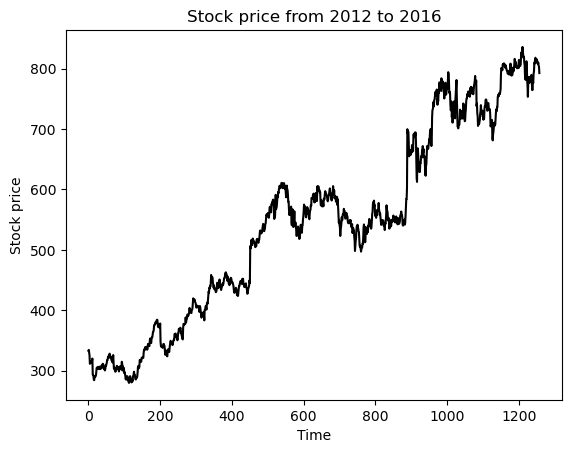

In [11]:
# Plotting the stock price from 2012 to 2016
plt.plot(df, color="black")
plt.xlabel("Time")
plt.ylabel("Stock price")
plt.title("Stock price from 2012 to 2016")

In [12]:
# Scaling tha data, reshape and convert into numpy array
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))
df1_test=scaler.fit_transform(np.array(df_test).reshape(-1,1))

In [13]:
df1.shape,df1_test.shape

((1258, 1), (20, 1))

In [14]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
x_train, y_train = create_dataset(df1, time_step)

In [17]:
x_train.shape,y_train.shape

((1158, 100), (1158,))

In [18]:
print(x_train)

[[0.09575436 0.09833822 0.08999256 ... 0.03758694 0.04538339 0.04016175]
 [0.09833822 0.08999256 0.08189897 ... 0.04538339 0.04016175 0.02924128]
 [0.08999256 0.08189897 0.05708709 ... 0.04016175 0.02924128 0.03177107]
 ...
 [0.94817742 0.94511948 0.94916672 ... 0.95312404 0.94974234 0.95357373]
 [0.94511948 0.94916672 0.95098349 ... 0.94974234 0.95357373 0.94393234]
 [0.94916672 0.95098349 0.95046189 ... 0.95357373 0.94393234 0.94089242]]


In [19]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

In [20]:
x_train.shape

(1158, 100, 1)

In [21]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Activation

In [22]:
model=Sequential()

model.add(LSTM(70,return_sequences=True,activation= 'relu',input_shape = (x_train.shape[1],1)))

model.add(LSTM(70,return_sequences=True,activation= 'relu'))

model.add(LSTM(50))

model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 70)           20160     
                                                                 
 lstm_1 (LSTM)               (None, 100, 70)           39480     
                                                                 
 lstm_2 (LSTM)               (None, 50)                24200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 83,891
Trainable params: 83,891
Non-trainable params: 0
_________________________________________________________________


In [135]:
history = model.fit(x_train,y_train,epochs=40, batch_size=32)

Epoch 1/40
37/37 [==============================] - 14s 216ms/step - loss: 0.0538
Epoch 2/40
37/37 [==============================] - 8s 217ms/step - loss: 0.0021
Epoch 3/40
37/37 [==============================] - 8s 217ms/step - loss: 0.0017
Epoch 4/40
37/37 [==============================] - 8s 216ms/step - loss: 0.0018
Epoch 5/40
37/37 [==============================] - 8s 216ms/step - loss: 0.0017
Epoch 6/40
37/37 [==============================] - 8s 216ms/step - loss: 0.0016
Epoch 7/40
37/37 [==============================] - 8s 217ms/step - loss: 0.0015
Epoch 8/40
37/37 [==============================] - 8s 218ms/step - loss: 0.0014
Epoch 9/40
37/37 [==============================] - 8s 217ms/step - loss: 0.0014
Epoch 10/40
37/37 [==============================] - 8s 218ms/step - loss: 0.0012
Epoch 11/40
37/37 [==============================] - 9s 233ms/step - loss: 0.0011
Epoch 12/40
37/37 [==============================] - 8s 229ms/step - loss: 0.0013
Epoch 13/40
37/37 [=====

In [24]:
train_predict=model.predict(x_train)

37/37 [==============================] - 3s 52ms/step


In [25]:
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
train_predict

array([[786.1522 ],
       [786.1524 ],
       [786.1526 ],
       ...,
       [786.4277 ],
       [786.42926],
       [786.43085]], dtype=float32)

In [26]:
total= pd.concat([train_data['Close'], test_data['Close']], axis= 0)
total

0     333.038025
1     334.474487
2     329.834839
3     325.335327
4     311.541534
         ...    
15    835.670000
16    832.150000
17    823.310000
18    802.320000
19    796.790000
Name: Close, Length: 1278, dtype: float64

In [27]:
total.shape

(1278,)

In [28]:
test_data1= total[len(total)- len(test_data)-100:].values

In [29]:
test_data1 = test_data1.reshape(-1,1)
test_data1

array([[808.48999 ],
       [808.200012],
       [807.049988],
       [805.960022],
       [801.190002],
       [805.419983],
       [802.75    ],
       [799.650024],
       [796.950012],
       [796.590027],
       [793.599976],
       [791.299988],
       [793.219971],
       [795.820007],
       [791.919983],
       [789.849976],
       [791.400024],
       [796.869995],
       [808.02002 ],
       [807.98999 ],
       [802.840027],
       [788.47998 ],
       [798.820007],
       [788.719971],
       [790.460022],
       [801.22998 ],
       [797.969971],
       [795.390015],
       [799.780029],
       [805.030029],
       [815.950012],
       [814.960022],
       [802.650024],
       [810.72998 ],
       [810.059998],
       [802.640015],
       [804.059998],
       [800.380005],
       [802.789978],
       [801.22998 ],
       [803.080017],
       [800.710022],
       [814.169983],
       [809.570007],
       [811.77002 ],
       [804.080017],
       [804.599976],
       [806.8

In [30]:
test_input= scaler.fit_transform(test_data1)

In [31]:
test_input.max()

1.0

In [32]:
x_test1= []
for i in range(100,120):
    x_test1.append(test_input[i-100:i, 0])

In [33]:
x_test= np.array(x_test1)

In [34]:
x_test.shape

(20, 100)

In [35]:
x_test= x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [36]:
x_test.shape

(20, 100, 1)

In [37]:
# Predict the actual prices and predicting prices of stock and their price differences
predicted_value= model.predict(x_test)
predicted_value= scaler.inverse_transform(predicted_value)
test_data['pred'] = pd.DataFrame(predicted_value)

1/1 [==============================] - 0s 68ms/step


C:\Users\stepo\AppData\Local\Temp\ipykernel_17124\675064864.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['pred'] = pd.DataFrame(predicted_value)


In [150]:
predicted_value

array([[801.0279 ],
       [794.0599 ],
       [789.97455],
       [791.5386 ],
       [799.1575 ],
       [805.6442 ],
       [807.84296],
       [808.6053 ],
       [807.71094],
       [807.081  ],
       [805.3431 ],
       [804.61694],
       [802.9785 ],
       [803.1213 ],
       [809.8235 ],
       [817.36255],
       [823.13666],
       [826.7061 ],
       [825.4438 ],
       [814.0408 ]], dtype=float32)

In [151]:
test_data['Diff'] = pd.concat([test_data['Close']-test_data['pred']])

C:\Users\stepo\AppData\Local\Temp\ipykernel_5192\3413746803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Diff'] = pd.concat([test_data['Close']-test_data['pred']])


In [38]:
test_data

,Close,pred
0,786.14,753.503418
1,786.90,753.518494
2,794.02,753.531006
3,806.15,753.540100
4,806.65,753.544861
5,804.79,753.546265
6,807.91,753.545410
7,806.36,753.543152
8,807.88,753.540283
9,804.61,753.537292


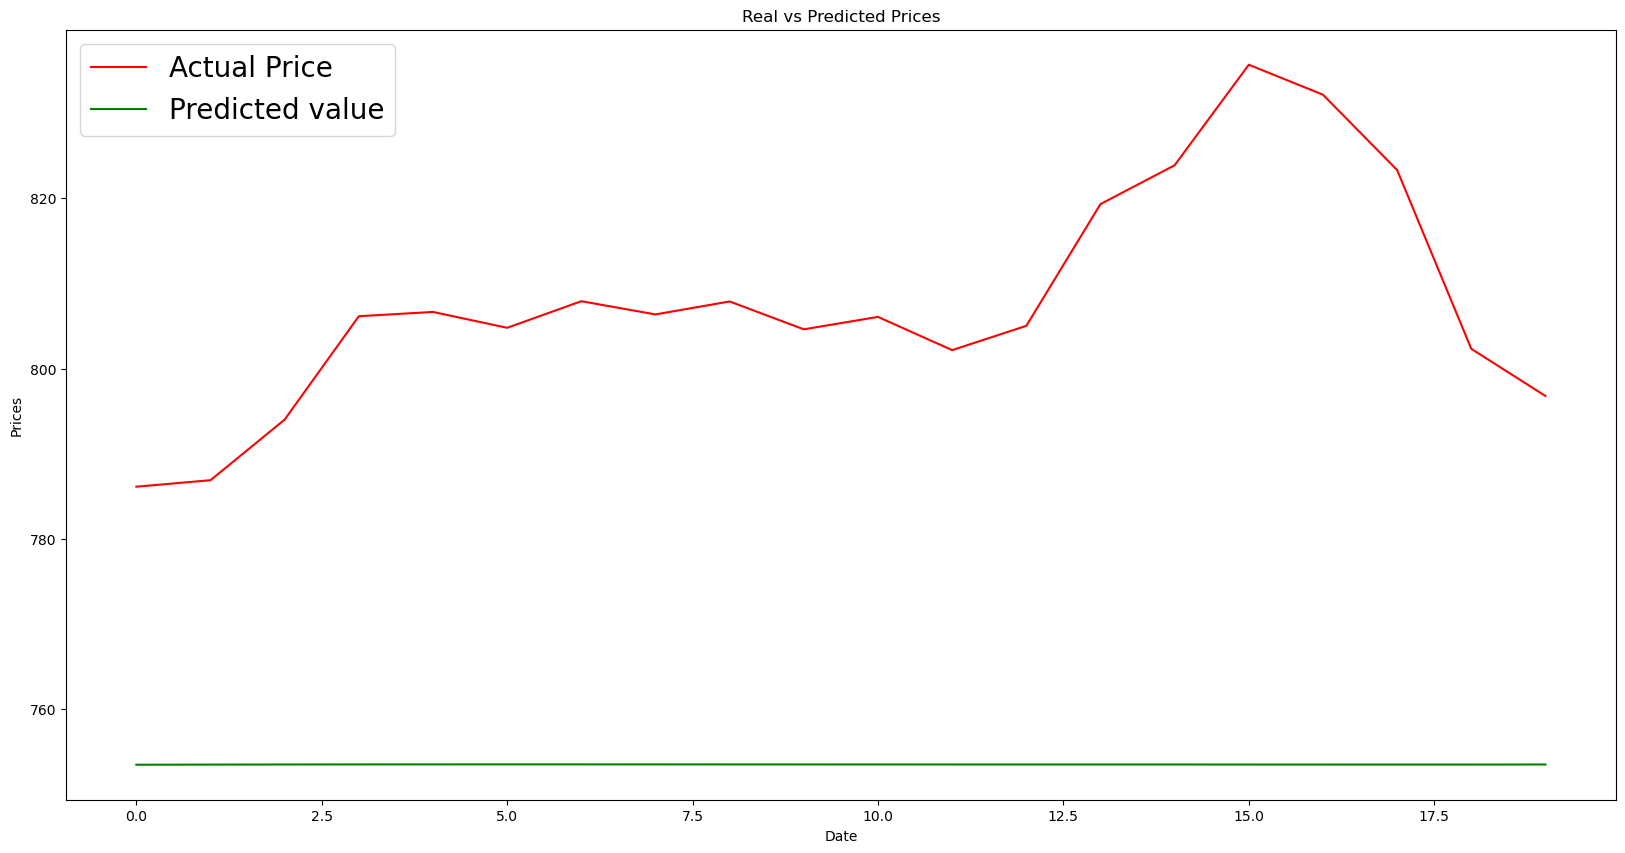

In [39]:
# Plot the actual prices and predicting prices od stock
plt.figure(figsize= (20,10))
plt.plot(test_data['Close'], 'red', label= 'Actual Price')
plt.plot(test_data['pred'], 'green', label= 'Predicted value')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)